In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

## Load Data and create new columns
Two new columns are added to the DataFrame to calculate average usage and subscription lifetime value, which 
may improve prediction accuracy in further analysis.

In [2]:
df =pd.read_csv("cleaned_data.csv")
df['average_usage'] = (df['download_avg'] + df['upload_avg']) / 2
df['subscription_lifetime_value'] = df['subscription_age'] * df['bill_avg']

## Undersampling

In [3]:
# Calculate which class is in higher demand in the target variable 'churn'
churn = len(df.loc[df['churn'] == 1])
not_churn = len(df.loc[df['churn'] == 0])

# Determine the majority and minority
if churn > not_churn:
    majority_class = 1
    minority_class = 0
else:
    majority_class = 0
    minority_class = 1

# Undersample the majority class to balance the classes
undersample = RandomUnderSampler(sampling_strategy={majority_class: len(df.loc[df['churn'] == minority_class])})
X = df.drop(columns=['churn'])
y = df['churn']

# Resample the feature set X and target variable y using undersampling
X_under, y_under = undersample.fit_resample(X, y)


## Feature normalisation


In [4]:
sc=StandardScaler()
X_sc = sc.fit_transform(X_under)
X_scaled_df = pd.DataFrame(X_sc, columns=X_under.columns)


The code checks the correlation between the target variable and each feature column in the dataframe. If the correlation is greater than 0.2, the feature column is selected for further modeling.

In [5]:
corr_matrix = X_scaled_df.corrwith(y_under)
threshold = 0.2

significant_features = corr_matrix[abs(corr_matrix) > threshold].sort_values(ascending=False)

X_sel = X_scaled_df[significant_features.index]
significant_features

average_usage                 -0.288565
download_avg                  -0.290632
is_movie_package_subscriber   -0.308588
is_tv_subscriber              -0.342918
is_contract                   -0.487403
remaining_contract            -0.670830
dtype: float64

## Machine Learning Models
In this part, we will be using the KNN, Random Forest, Gradient Boosting, and Regression algorithms to make predictions. To ensure unbiased predictions, we will be using cross-validation.

We conducted two tests for each algorith, one with all columns in the dataset and the other with only columns having correlation greater than 0.2, to compare the prediction accuracy and determine if removing the least important features improves results.

## KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

Columns without changes

In [8]:
k_fold = 5
y_pred = cross_val_predict(knn, X_sc, y_under, cv=k_fold)

# Compute evaluation metrics
accuracy = accuracy_score(y_under, y_pred)
precision = precision_score(y_under, y_pred)
recall = recall_score(y_under, y_pred)
f1 = f1_score(y_under, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.67878340608611
Precision: 0.6242524771923698
Recall: 0.8982193888766762
F1-score: 0.7365859311623594


columns above 20% correlation

In [9]:
y_pred = cross_val_predict(knn, X_sel, y_under, cv=k_fold)

# Compute evaluation metrics
accuracy_knn= accuracy_score(y_under, y_pred)
precision_knn= precision_score(y_under, y_pred)
recall_knn = recall_score(y_under, y_pred)
f1_knn = f1_score(y_under, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn )
print("F1-score:", f1_knn )

Accuracy: 0.9029300003140408
Precision: 0.9134203318833575
Recall: 0.8902427535094055
F1-score: 0.9016826234931138


In [10]:
## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)


Columns without changes

In [13]:
y_pred_rf = cross_val_predict(rfc, X_sc, y_under, cv=k_fold)
accuracy_rf = accuracy_score(y_under, y_pred_rf)
precision_rf = precision_score(y_under, y_pred_rf)
recall_rf = recall_score(y_under, y_pred_rf)
f1_rf = f1_score(y_under, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.5844298589956977
Precision: 0.5493311803886309
Recall: 0.9401752347454699
F1-score: 0.6934747863148872


columns above 20% correlation

In [14]:
y_pred_rf = cross_val_predict(rfc, X_sel, y_under, cv=k_fold)
accuracy_rf = accuracy_score(y_under, y_pred_rf)
precision_rf = precision_score(y_under, y_pred_rf)
recall_rf = recall_score(y_under, y_pred_rf)
f1_rf = f1_score(y_under, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9334390603900387
Precision: 0.9364130778473408
Recall: 0.9300317181170116
F1-score: 0.933211489073406


## Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier


In [16]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)


Columns without changes

In [17]:
y_pred_gbc = cross_val_predict(rfc, X_sc, y_under, cv=k_fold)
accuracy_gbc = accuracy_score(y_under, y_pred_gbc)
precision_gbc = precision_score(y_under, y_pred_gbc)
recall_gbc = recall_score(y_under, y_pred_gbc)
f1_gbc = f1_score(y_under, y_pred_gbc)

In [18]:
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1-score:", f1_gbc)

Accuracy: 0.5844298589956977
Precision: 0.5493311803886309
Recall: 0.9401752347454699
F1-score: 0.6934747863148872


columns above 20% correlation

In [19]:
y_pred_gbc = cross_val_predict(rfc, X_sel, y_under, cv=k_fold)
accuracy_gbc = accuracy_score(y_under, y_pred_gbc)
precision_gbc = precision_score(y_under, y_pred_gbc)
recall_gbc = recall_score(y_under, y_pred_gbc)
f1_gbc = f1_score(y_under, y_pred_gbc)

In [20]:
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1-score:", f1_gbc)

Accuracy: 0.9334390603900387
Precision: 0.9364130778473408
Recall: 0.9300317181170116
F1-score: 0.933211489073406


## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

model = LinearRegression()

k = 5 # for k fold


mse_scores = [] # results

# K-fold
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(X_sel):
    X_train, X_test = X_sel.iloc[train_index], X_sel.iloc[test_index]
    y_train, y_test = y_under.iloc[train_index], y_under.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print("Results in each k:")
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")
print("Mean MSE:", np.mean(mse_scores))


Results in each k:
Fold 1: MSE = 0.22576882043207866
Fold 2: MSE = 0.20324503687120563
Fold 3: MSE = 0.08231301068147288
Fold 4: MSE = 0.1542927923237865
Fold 5: MSE = 0.1519894135981591
Mean MSE: 0.16352181478134054


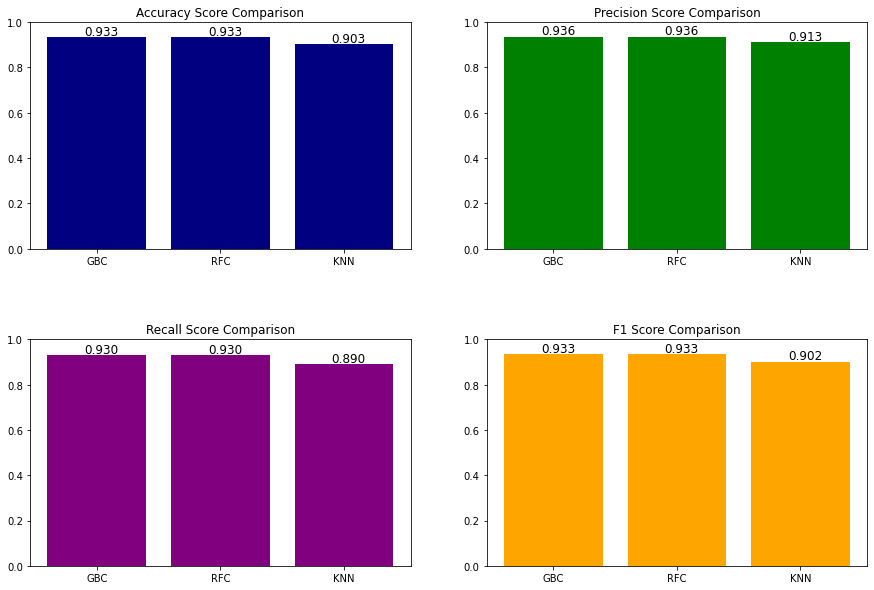

In [22]:
import matplotlib.pyplot as plt

classifiers = ['GBC', 'RFC', 'KNN']
accuracy_scores = [accuracy_gbc, accuracy_rf, accuracy_knn]
precision_scores = [precision_gbc, precision_rf, precision_knn]
recall_scores = [recall_gbc, recall_rf, recall_knn]
f1_scores = [f1_gbc, f1_rf, f1_knn]

fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.4)
ax[0, 0].bar(classifiers, accuracy_scores, color='navy')
ax[0, 0].set_title('Accuracy Score Comparison')
ax[0, 0].set_ylim([0, 1.0])
for i, v in enumerate(accuracy_scores):
    ax[0, 0].text(i - 0.1, v + 0.01, "{:.3f}".format(v), fontsize=12)
ax[0, 1].bar(classifiers, precision_scores, color='green')
ax[0, 1].set_title('Precision Score Comparison')
ax[0, 1].set_ylim([0, 1.0])
for i, v in enumerate(precision_scores):
    ax[0, 1].text(i - 0.1, v + 0.01, "{:.3f}".format(v), fontsize=12)
ax[1, 0].bar(classifiers, recall_scores, color='purple')
ax[1, 0].set_title('Recall Score Comparison')
ax[1, 0].set_ylim([0, 1.0])
for i, v in enumerate(recall_scores):
    ax[1, 0].text(i - 0.1, v + 0.01, "{:.3f}".format(v), fontsize=12)
ax[1, 1].bar(classifiers, f1_scores, color='orange')
ax[1, 1].set_title('F1 Score Comparison')
ax[1, 1].set_ylim([0, 1.0])
for i, v in enumerate(f1_scores):
    ax[1, 1].text(i - 0.1, v + 0.01, "{:.3f}".format(v), fontsize=12)

plt.savefig('comparison_chart.png', dpi=300, bbox_inches='tight')
plt.show()
